In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import linear_model
import statsmodels.api as sm

In [120]:
data_raw = pd.read_csv('Fish.csv')

In [121]:
data_raw.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [122]:
#correlation found for Weight variable
from sklearn.preprocessing import StandardScaler
data_no_spec = data_raw.drop('Species', axis=1)
data_corr = data_no_spec.corr()
data_corr['Weight'].sort_values(ascending=False)

Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022748F1B850>,
      dtype=object)

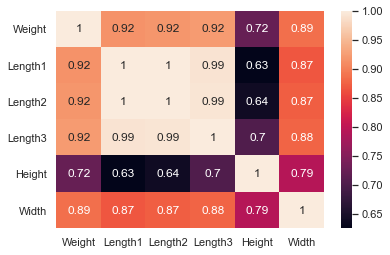

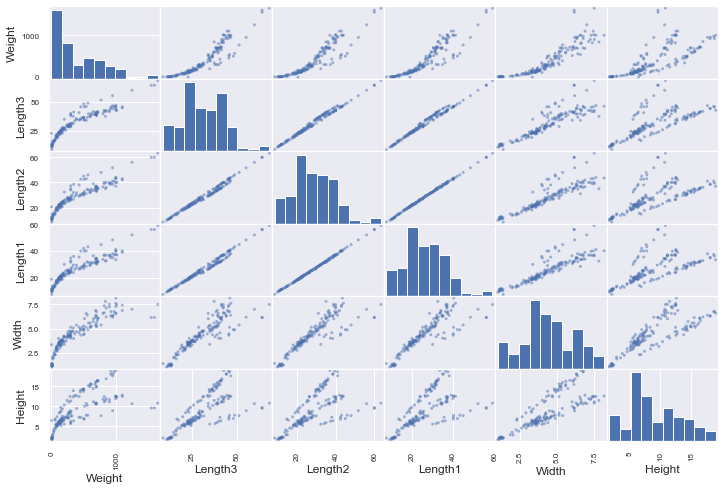

In [123]:
#Plot a correlation matrix heat map using seaborn
sns.heatmap(data_corr, annot = True)

#Correlation Matrix plotted for each attribute
from pandas.plotting import scatter_matrix
attributes = ['Weight','Length3','Length2','Length1','Width','Height',]
scatter_matrix(data_no_spec[attributes], figsize=(12,8))



In [124]:
x = data_no_spec[['Length3']]
y = data_no_spec['Weight']
x_log = np.log(x)

In [125]:
from sklearn.linear_model import LinearRegression
x_log.head()
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [126]:
reg.intercept_

-490.4005915891796

In [127]:
reg.coef_

array([28.4601708])

In [128]:
reg.score(x, y)

0.8520094124796922

In [129]:
# Let's use the handy function we created
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [130]:
adj_r2(x,y)

0.8510667972725565

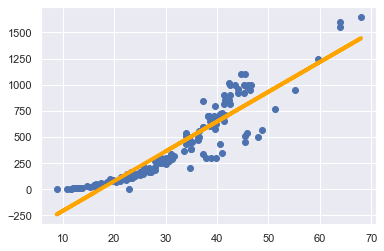

In [131]:
yhat = reg.coef_*x + reg.intercept_
plt.plot(x,yhat,lw=4, c='orange')
plt.scatter(x,y)